In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
import os

In [2]:
os.chdir('/home/jh8862/theory-lab/comp-lab-2023/Week5/Analysis')

In [3]:
traj = md.load('../Inputs/mdsim_1.trr', top='../Inputs/mdsim_1.gro')

In [20]:
phi = md.compute_phi(traj)

In [21]:
psi = md.compute_psi(traj)

In [6]:
time = np.arange(0, 5001, 1)
len(time)

5001

In [7]:
dt = time * 0.002

In [8]:
dt

array([0.000e+00, 2.000e-03, 4.000e-03, ..., 9.996e+00, 9.998e+00,
       1.000e+01])

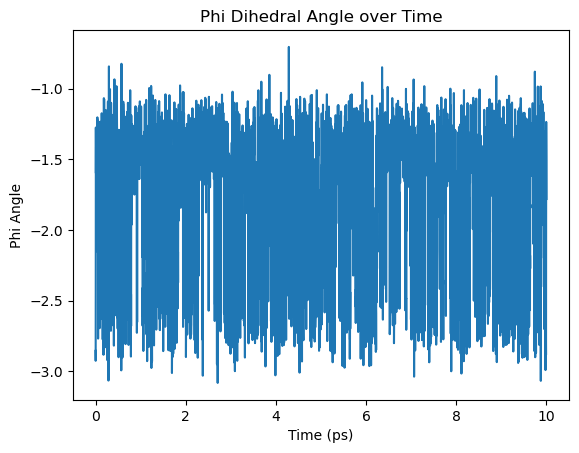

In [9]:
fig, ax = plt.subplots()
ax.plot(dt, phi[1])

ax.set(xlabel='Time (ps)', ylabel="Phi Angle")
ax.set_title("Phi Dihedral Angle over Time")
plt.savefig("../Figures/phi_v_time.png", dpi=300, bbox_inches="tight")
plt.show()

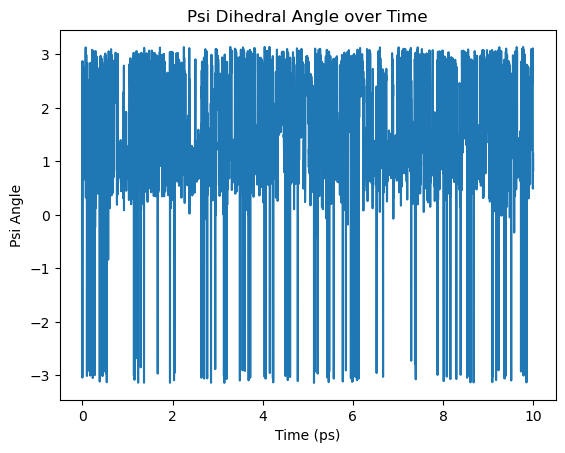

In [10]:
fig, ax = plt.subplots()
ax.plot(dt, psi[1])

ax.set(xlabel='Time (ps)', ylabel="Psi Angle")
ax.set_title("Psi Dihedral Angle over Time")
plt.savefig("../Figures/psi_v_time.png", dpi=300, bbox_inches="tight")
plt.show()

In [43]:
phi_arr = np.asarray(phi[1]).flatten()
psi_arr = np.asarray(psi[1]).flatten()

In [46]:
hist, x_edges, y_edges = np.histogram2d(phi_arr, psi_arr, bins=20)

In [50]:
hist_log = hist
hist_log[hist_log == 0] = 1

In [52]:
F = -np.log(hist_log)

In [53]:
min_F = np.min(F)

In [54]:
F_normalized = F - min_F

In [56]:
X, Y = np.meshgrid(x_edges, y_edges)

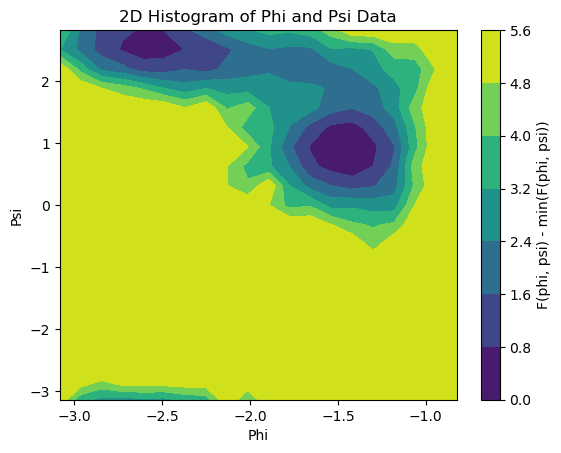

In [58]:
plt.contourf(X[:-1, :-1], Y[:-1, :-1], F_normalized.T, cmap='viridis')
plt.colorbar(label='F(phi, psi) - min(F(phi, psi))')
plt.xlabel('Phi')
plt.ylabel('Psi')
plt.title('2D Histogram of Phi and Psi Data')
plt.savefig("../Figures/2Dhist_phi_psi.jpg", dpi=300, bbox_inches="tight")
plt.show()